In [21]:
import torch
import sys

sys.path.append('..')

import SourceCode

In [22]:
from math import pi, e
import torch
from SourceCode.utilities import nth_derivative
from SourceCode.EquationClass import OneDimensionalMainEquation
from SourceCode.DomainClass import OneDimensionalSimpleDomain
from SourceCode.InitConditionClass import OnePointInitialCondition
from SourceCode.TrainerForNNEquationSolver import TrainerForNNEquationSolver
from SourceCode.ReportMaker import ReportMaker
import time


n_epochs = 10
n_points = 10
dh = 1e-3

# №1

$$ x'= -y $$
$$ y' = x + cost(t) $$
$$ x(0) = 0$$ $$y(0) = 0$$
$$t \in [0,1] $$
True_solution: $$x = -\frac{1}{2}tsin(t)$$ $$y = tcos(t) + \frac{1}{2}sin(t)$$

In [23]:
left_bound = 0
right_bound = 1
main_eq_residual1 = lambda t, x, y: nth_derivative(x, t, 1) + y(t)
main_eq_residual2 = lambda t, x, y: nth_derivative(y, t, 1) - x(t) - torch.cos(t)
main_eq_residuals = [main_eq_residual1, main_eq_residual2]
n_points = 20
true_sol1 = lambda x: -1/2 * x * torch.sin(x)
true_sol2 = lambda x: 1/2*(x*torch.cos(x) + torch.sin(x))
true_solutions = [true_sol1, true_sol2]
main_domain = OneDimensionalSimpleDomain(left_bound + dh, right_bound, n_points)


first_init_cond_res = lambda x, nn_model1, nn_model2: nn_model1(x) - 0
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model1, nn_model2: nn_model2(x) - 0
second_init_cond = OnePointInitialCondition(left_bound, second_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond]

main_eq = OneDimensionalMainEquation(main_domain, main_eq_residuals, boundary_conditions)


n_epochs = 20
nn_ode_solver = TrainerForNNEquationSolver(main_eq)
loss_train, loss_valid, nn_models = nn_ode_solver.fit()

Train max absolute error |Appr(x)-y(x)|: 4.587743023876101e-05
Valid max absolute error |Appr(x)-y(x)|: 4.630697731045075e-05
MAPE on train data: 0.004349980008555576 %
MAPE on validation data: 0.004381109465612099 %
Max residual square loss on train at last epoch: 0.0005859732627868652 


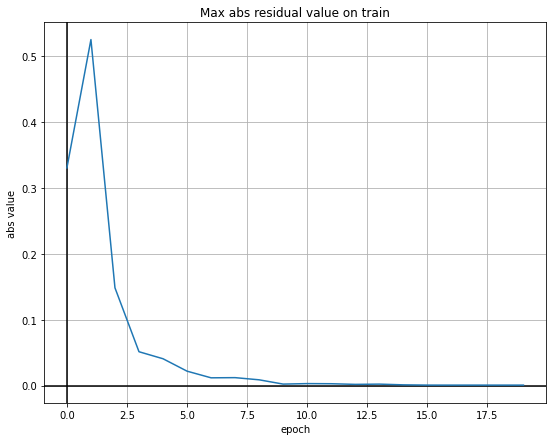

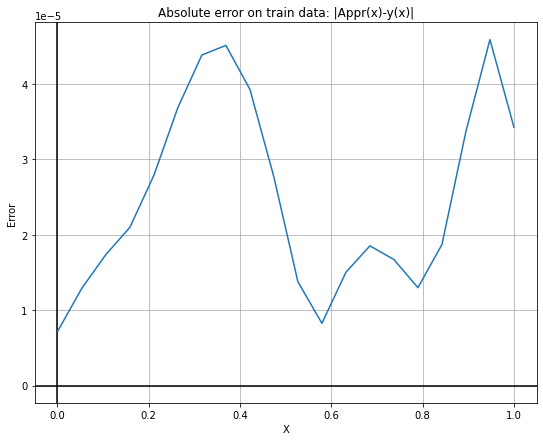

In [25]:
report = ReportMaker(true_solutions, nn_models, main_eq, loss_train, loss_valid, main_domain, num_epochs=n_epochs,
                    do_plot_func=False)
report.make_report()

In [26]:
report.print_comparison_table()

       Input  Analytical_x1    ANN_x1  Analytical_x2    ANN_x2     Error
0   0.001000  -5.000000e-07  0.000002       0.001000  0.000993  0.000007
1   0.053579  -1.434665e-03 -0.001441       0.053528  0.053516  0.000013
2   0.106158  -5.624172e-03 -0.005625       0.105759  0.105742  0.000017
3   0.158737  -1.254585e-02 -0.012534       0.157406  0.157389  0.000021
4   0.211316  -2.216139e-02 -0.022136       0.208181  0.208170  0.000028
5   0.263895  -3.441747e-02 -0.034381       0.257801  0.257799  0.000037
6   0.316474  -4.924604e-02 -0.049203       0.305987  0.305994  0.000044
7   0.369053  -6.656455e-02 -0.066521       0.352468  0.352479  0.000045
8   0.421632  -8.627629e-02 -0.086238       0.396978  0.396988  0.000039
9   0.474211  -1.082709e-01 -0.108244       0.439260  0.439264  0.000028
10  0.526789  -1.324245e-01 -0.132411       0.479066  0.479063  0.000014
11  0.579368  -1.586008e-01 -0.158601       0.516158  0.516150  0.000008
12  0.631947  -1.866511e-01 -0.186663       0.55031